# 作业四：垃圾分类项目


# 一、项目背景介绍


伴随着我国城市化生活的进程加快，居民生活水平的不断提升，生活垃圾产生量保持稳定増长的趋势，近年来我国已成为世界上生活垃圾处理压力最大的国家之一。垃圾分类处理作为垃圾处理的重要手段,对于进一步提高垃圾的资源化利用效率,降低垃圾处理成本和处理难度具有重要作用.


<img style="display: block; margin: 0 auto;" src="https://ai-studio-static-online.cdn.bcebos.com/1f8c05a1a54c457baf5c2a4083a4a228ffa8a650f83b436b8e9eb42bb28d7dab" width = "40%" height = "40%" />

同时，垃圾分类是保护环境，改善人居环境、促进城市更加精细化管理、保障可持续发展的重要举措。反映一个人，乃至一座城市的生态素养和文明程度，最重要的就是垃圾分类。通过对于垃圾的分类可以有效地实现资源的再利用与合理处理分类垃圾。通过垃圾分类方法，帮助人们有效实现对日常垃圾的分类处理，极大地降低城市垃圾分类监管部门的人力物力财力。


# 二、数据介绍

数据集为:[垃圾分类数据集](https://aistudio.baidu.com/aistudio/datasetdetail/129383)

数据集共包含3313格式

图片类型均为jgp格式

In [2]:
# 解压数据集
!unzip -oq /home/aistudio/data/data129383/train.zip

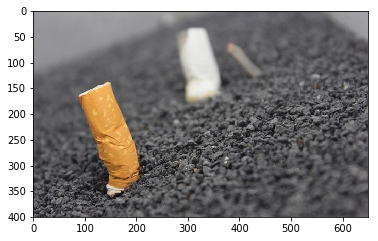

In [4]:
#样本的可视化展示
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(cv2.imread("train/c/img_1023.jpg")[:,:,::-1])

# 三、模型介绍

**ShuffleNet V2**
------------------------

在同等复杂度下，比ShuffleNet和MobileNetv2更准确。

<img style="display: block; margin: 0 auto;" src="https://ai-studio-static-online.cdn.bcebos.com/621c46ccbed24449af3c2175e3df0dfbe724435a455141918597a8950699af93" width = "60%" height = "60%" />

**ShuffleNetv1与ShuffleNetv2的比较**

<img style="display: block; margin: 0 auto;" src="https://ai-studio-static-online.cdn.bcebos.com/0ed5168427eb45a7bdf011eb5a1f70cf326796fff401452795dc9c8080181347" width = "60%" height = "60%" />

(a): the basic ShuffleNet-V1 unit; (b) the ShuffleNet-V1 unit for spatial down sampling (2×); (c) ShuffleNet-V2 basic unit; (d) ShuffleNet-V2 unit for spatial down sampling (2×)

**ShuffleNet v2的具体网络结构示意图**

不同stage的输出通道倍数关系和前面描述的吻合，每个stage都是由Figure3（c）（d）所示的block组成，block的具体数量对于Figure5中的Repeat列。 

<img style="display: block; margin: 0 auto;" src="https://ai-studio-static-online.cdn.bcebos.com/fecd78f6aa7b4066bd213c30a91bcc5af4fc1fc5129646ee937e5f77f4e6e6d8" width = "60%" height = "60%" />

# 四、模型训练

该部分主要是实践部分，也是相对来说话费时间最长的一部分，该部分主要展示模型训练的内容，同时向大家讲解模型参数的设置

In [ ]:
# 安装paddleclas以及相关三方包
!git clone https://gitee.com/paddlepaddle/PaddleClas.git -b release/2.2

In [ ]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 导入所需要的库
from sklearn.utils import shuffle
import os
import pandas as pd
import numpy as np
from PIL import Image
import paddle
import paddle.nn as nn
from paddle.io import Dataset
import paddle.vision.transforms as T
import paddle.nn.functional as F
from paddle.metric import Accuracy
import random

In [ ]:
dirpath = "train"

def get_all_txt():
    all_list = []
    i = 0
    for root,dirs,files in os.walk(dirpath):
        for file in files:
            i = i + 1             

            if("a" in root):
                all_list.append(os.path.join(root,file)+" 0\n")
            if("b" in root):
                all_list.append(os.path.join(root,file)+" 1\n")
            if("c" in root):
                all_list.append(os.path.join(root,file)+" 2\n")
            if("d" in root):
                all_list.append(os.path.join(root,file)+" 3\n")
            if("e" in root):
                all_list.append(os.path.join(root,file)+" 4\n")
            if("f" in root):
                all_list.append(os.path.join(root,file)+" 6\n")
            if("g" in root):
                all_list.append(os.path.join(root,file)+" 6\n")
            if("h" in root):
                all_list.append(os.path.join(root,file)+" 7\n")
            if("i" in root):
                all_list.append(os.path.join(root,file)+" 8\n")
            if("j" in root):
                all_list.append(os.path.join(root,file)+" 9\n")
    allstr = ''.join(all_list)
    f = open('all_list.txt','w',encoding='utf-8')
    f.write(allstr)
    return all_list , i

all_list,all_lenth = get_all_txt()
print(all_lenth-1)

In [ ]:
#打乱数据
random.shuffle(all_list)
random.shuffle(all_list)

train_size = int(all_lenth * 0.8)
train_list = all_list[:train_size]
val_list = all_list[train_size:]

print(len(train_list))
print(len(val_list))

# 生成txt 
train_txt = ''.join(train_list)
f_train = open('train_list.txt','w',encoding='utf-8')
f_train.write(train_txt)
f_train.close()
print("train_list.txt 生成成功！")

# 生成txt
val_txt = ''.join(val_list)
f_val = open('val_list.txt','w',encoding='utf-8')
f_val.write(val_txt)
f_val.close()
print("val_list.txt 生成成功！")

In [ ]:
!mv train/ PaddleClas/dataset/
!mv all_list.txt PaddleClas/dataset/train
!mv train_list.txt PaddleClas/dataset/train
!mv val_list.txt PaddleClas/dataset/train

In [ ]:
%cd PaddleClas
!ls

In [ ]:
# 模型训练 
!python tools/train.py \
    -c ./ppcls/configs/quick_start/new_user/ShuffleNetV2_x0_25.yaml

# 五、模型评估


该部分主要是对训练好的模型进行评估，可以是用验证集进行评估，或者是直接预测结果。评估结果和预测结果尽量展示出来，增加吸引力。

In [ ]:
#预测一张图片
!python3 tools/infer.py \
    -c ./ppcls/configs/quick_start/new_user/ShuffleNetV2_x0_25.yaml \
    -o Infer.infer_imgs=dataset/train/predict_1.jpg \
    -o Global.pretrained_model=output/ShuffleNetV2_x0_25/latest

# 六、总结与升华

接近到项目的尾声时，需要进行主题的升华，也就是说明本项目的亮点，以及不足之处，后续应该如何改进等